In [1]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import io
import datetime
import numpy as np
from matplotlib import pyplot


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download3 = drive.CreateFile({'id': '1YXiLH7Vf8DTXvgh0PItfm4CAX3C6Q_KN'})
download3.GetContentFile('clickAzEnSon.csv')

In [0]:
download2 = drive.CreateFile({'id': '1px5GBDDiYe4HAbjBIWANIxqzRTHxEQrg'})
download2.GetContentFile('yoochoose-buys.dat')

In [0]:
def convertS(row):
  if row[3]== 'S':
    return 13
  return row[3]
  

In [0]:
def takeSeconds(row):
  dtm = datetime.datetime.strptime(str(row[1]), "%Y-%m-%dT%H:%M:%S.%fZ")
  epoch = datetime.datetime(1970,1,1)
  temp = (dtm-epoch).total_seconds()
  return temp
  

In [0]:
def label_year (row):
  dtm = datetime.datetime.strptime(str(row[1]), "%Y-%m-%dT%H:%M:%S.%fZ")
  return dtm.year

In [0]:
def label_month (row):
  dtm = datetime.datetime.strptime(str(row[1]), "%Y-%m-%dT%H:%M:%S.%fZ")
  return dtm.month

In [0]:
def label_day (row):
  dtm = datetime.datetime.strptime(str(row[1]), "%Y-%m-%dT%H:%M:%S.%fZ")
  return dtm.day

In [0]:
def label_hour (row):
  dtm = datetime.datetime.strptime(str(row[1]), "%Y-%m-%dT%H:%M:%S.%fZ")
  return dtm.hour

In [0]:
buy_headers = ["session","time","item","price","quantity"]
#click_headers = ["session","time","item","category", "didBuy"]

In [0]:
clicks = pd.read_csv('clickAzEnSon.csv', sep = ',',  low_memory = False)

In [0]:
clicks.head()

,Unnamed: 0,session_id,timestamp,item_id,category,didBuy
0,29,11,2014-04-03T10:53:49.875Z,214563337,0,0
1,30,11,2014-04-03T10:55:19.267Z,214706462,0,0
2,28,11,2014-04-03T10:53:22.572Z,214717089,0,0
3,31,11,2014-04-03T10:55:47.327Z,214717436,0,0
4,32,11,2014-04-03T10:56:30.520Z,214743335,0,0


In [0]:
len(clicks[clicks.didBuy == 1])

In [0]:
len(clicks[clicks.didBuy == 0])

In [0]:
clicks = clicks.drop(clicks.index[0])


In [0]:
clicks.columns = [ "index_before", "session", "timestamp", "item", "category", "didBuy"]

In [0]:
len(clicks[clicks.didBuy == 1])

In [0]:
clicks.head()

,session,timestamp,item,category,didBuy
0,11,2014-04-03T10:53:49.875Z,214563337,0,0
1,11,2014-04-03T10:55:19.267Z,214706462,0,0
2,11,2014-04-03T10:53:22.572Z,214717089,0,0
3,11,2014-04-03T10:55:47.327Z,214717436,0,0
4,11,2014-04-03T10:56:30.520Z,214743335,0,0


In [0]:
clicks = clicks.drop(['index_before'], axis = 1)

In [0]:
clicks.iloc[1:2].values

In [0]:
clicks['category'] = clicks.apply(lambda row : convertS(row), axis =1 )

In [0]:
clicks.category

In [0]:
read_buys = pd.read_csv('yoochoose-buys.dat', sep = ',', names=buy_headers, low_memory = False)

In [0]:
read_buys.head()

,session,time,item,price,quantity
0,420374,2014-04-06T18:44:58.314Z,214537888,12462,1
1,420374,2014-04-06T18:44:58.325Z,214537850,10471,1
2,281626,2014-04-06T09:40:13.032Z,214535653,1883,1
3,420368,2014-04-04T06:13:28.848Z,214530572,6073,1
4,420368,2014-04-04T06:13:28.858Z,214835025,2617,1


In [0]:
#read_buys = read_buys.drop(read_buys.index[0])

In [0]:
read_buys.head()

In [0]:
pyplot.plot(read_buys.session, read_buys.price)

In [0]:
pyplot.plot(read_buys.price, read_buys.quantity)

In [0]:
pyplot.hist(read_buys.price,  range = [0, 3350], bins=7)

(array([610030.,      0.,      0., 435065.,      0.,      0.,  75486.,
             0.,      0.,  11050.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

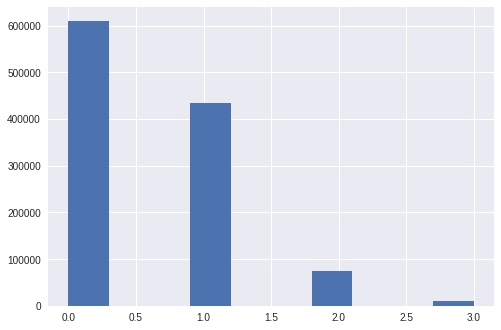

In [0]:
pyplot.hist(read_buys.quantity, range=[0,3] )

(array([622820.,  85278.,  95971.,  81964.,  40296.,  30890.,  13791.]),
 array([   0.        ,  285.71428571,  571.42857143,  857.14285714,
        1142.85714286, 1428.57142857, 1714.28571429, 2000.        ]),
 <a list of 7 Patch objects>)

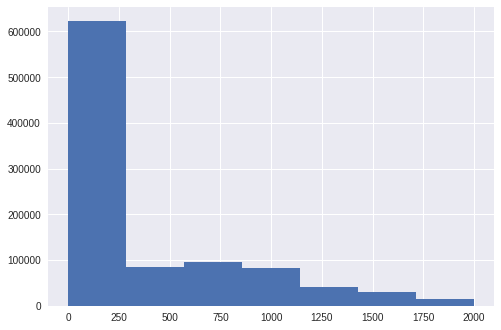

In [0]:
pyplot.hist(read_buys.price, bins=7, range = [0, 2000])

In [0]:
clicks.head()

In [0]:
clicks.columns

In [0]:
clicks.head()

In [0]:
pyplot.hist(clicks.item)

In [0]:
clicks[clicks.index == 266161]

In [0]:
clicks['year'] = clicks.apply(lambda row : label_year(row), axis =1 )

In [0]:
clicks.head()

,session,timestamp,item,category,didBuy
0,11,2014-04-03T10:53:49.875Z,214563337,0,0
1,11,2014-04-03T10:55:19.267Z,214706462,0,0
2,11,2014-04-03T10:53:22.572Z,214717089,0,0
3,11,2014-04-03T10:55:47.327Z,214717436,0,0
4,11,2014-04-03T10:56:30.520Z,214743335,0,0


In [0]:
clicks['month'] = clicks.apply(lambda row : label_month(row), axis =1 )

In [0]:
clicks['day'] = clicks.apply(lambda row : label_day(row), axis =1 )

In [0]:
clicks['hour'] = clicks.apply(lambda row : label_hour(row), axis =1 )

In [0]:
clicks['time_in_sec'] = clicks.apply(lambda row : takeSeconds(row), axis =1 )

In [0]:
clicks.head()

In [0]:
sessionFreq = clicks["session"].value_counts()


In [0]:
clicks["sessionFreq"] = clicks["session"].map(lambda x: sessionFreq[x])


In [0]:
itemFreq = clicks["item"].value_counts()

In [0]:
clicks["itemFreq"] = clicks["item"].map(lambda x: itemFreq[x])

In [0]:
clicks.iloc[1:20,:]

In [0]:
read_buys.head()

 ** **MISSING VALUES CHANGED WITH THE MEAN VALUE** **bold text**

In [0]:
len(read_buys[read_buys.price == 0])

In [0]:
buysNoMissing = read_buys[read_buys.price != 0]

In [0]:
buysMissing = read_buys[read_buys.price == 0 ]
buysAllMissing = buysMissing[buysMissing.quantity == 0 ]

In [0]:
buysNoMissing2 = read_buys[read_buys.price != 0]

In [0]:
month4 = clicks[clicks.month ==4]

In [0]:
month4price = read_buys[read_buys.session.isin(month4.session)]

In [0]:
month4priceVal = month4price.price.mean()

In [0]:
month5 = clicks[clicks.month ==5]

In [0]:
month5price = read_buys[read_buys.session.isin(month5.session)]

In [0]:
month5priceVal = month5price.price.mean()

In [0]:
month6 = clicks[clicks.month ==6]

In [0]:
month6price = read_buys[read_buys.session.isin(month6.session)]

In [0]:
month8 = clicks[clicks.month ==8]

In [0]:
month8price = read_buys[read_buys.session.isin(month8.session)]

In [0]:
month8priceVal = month8price.price.mean()

In [0]:
month9 = clicks[clicks.month ==9]

In [0]:
month9price = read_buys[read_buys.session.isin(month9.session)]

In [0]:
month9priceVal = month9price.price.mean()

In [0]:
priceArray = [month4priceVal,month8priceVal,month9priceVal ]

In [0]:
month9priceVal

In [0]:
x = np.array([4,8,9])

In [0]:
pric_arr = np.array([month4priceVal,month8priceVal,month9priceVal] )

In [0]:
tmp = np.array([[ 4,3703.56], [5,2877.099],  [6,2073.624], [7,1545.811],[ 8,1628.61],[ 9,2739.252]])

In [0]:
tmp2 = np.array([[ 4,3703.56], [5,0],  [6,0], [7,0],[ 8,1628.61],[ 9,2739.252]])

In [0]:
dataset = pd.DataFrame({'Column1':tmp[:,0],'Column2':tmp[:,1]})

In [0]:
dataset2 = pd.DataFrame({'Column1':tmp2[:,0],'Column2':tmp2[:,1]})

In [0]:
dataset.head()

,Column1,Column2
0,4.0,3703.561159
1,8.0,1628.612324
2,9.0,2739.252856


In [0]:
X = dataset2.iloc[:, 0:1].values
y= dataset2.iloc[:, 1].values

In [0]:
dataset['Column3'] = [5,6,7]

In [0]:
dataset

In [0]:
X_test = dataset.iloc[:, 2:].values

In [0]:
X_test

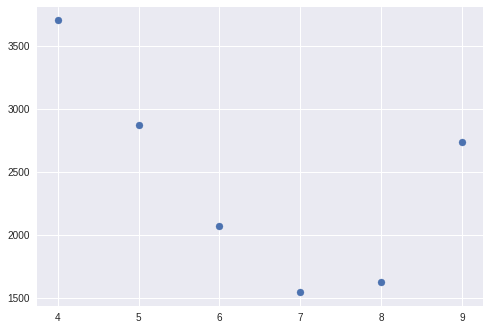

In [5]:
pyplot.scatter(X,y)

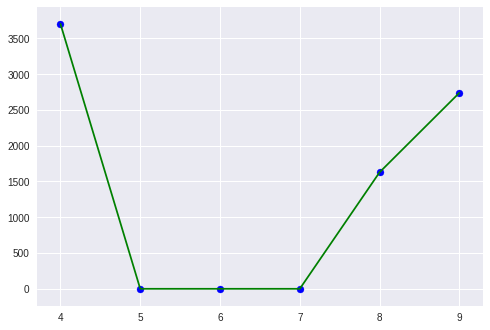

In [17]:
pyplot.plot(X, y, color = 'green')
pyplot.scatter(X, y, color = 'blue')

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
poly = PolynomialFeatures(degree = 4) 

In [0]:
X_poly = poly.fit_transform(X) 

In [0]:
poly.fit(X_poly, y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [0]:
#poly.predict()

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
line = LinearRegression()

In [0]:
line.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

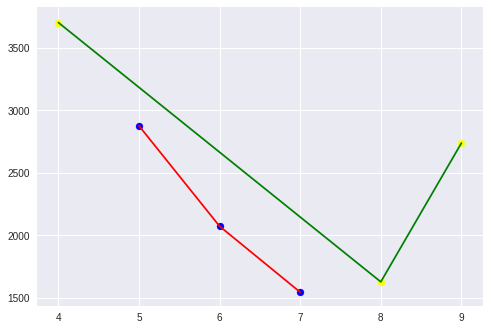

In [0]:
pyplot.scatter(X_test, line.predict(poly.fit_transform(X_test)), color = 'blue')
pyplot.scatter(X, y, color = 'yellow')
pyplot.plot(X_test, line.predict(poly.fit_transform(X_test)), color = 'red')
pyplot.plot(X, y, color = 'green')

In [0]:
dataset['column4'] = line.predict(poly.fit_transform(X_test))

In [0]:
dataset1 = dataset.drop(['Column3', 'column4'], axis=1)

In [0]:
dataset2 = dataset.drop(['Column1', 'Column2'], axis=1)

In [0]:
dataset2.columns = ['Column1', 'Column2']

In [0]:
dataset1.head()

In [0]:
dataset1 = dataset1.append(dataset2)

In [0]:
dataset.head()

,Column1,Column2,Column3,column4
0,4.0,3703.561159,5,2877.099156
1,8.0,1628.612324,6,2073.624329
2,9.0,2739.252856,7,1545.811743


In [0]:
dataset.head()

In [0]:
month6priceVal = month6price.price.mean()

In [0]:
month7 = clicks[clicks.month ==7]

In [0]:
month7price = read_buys[read_buys.session.isin(month7.session)]

In [0]:
month7priceVal = month7price.price.mean()

In [0]:
len(buysAllMissing)

In [0]:
buysAllMissing.head()


In [0]:
month5priceVal =dataset['column4'][0]

In [0]:
month6priceVal =dataset['column4'][1]

In [0]:
month7priceVal =dataset['column4'][2]

In [0]:
buysNoMissing['price'].mean()

In [0]:
buysNoMissing['quantity'].mean()

In [0]:
len(read_buys)

In [0]:
from math import ceil

In [0]:
buysAllMissing.price = ceil(temp_price)
buysAllMissing.quantity = ceil(temp_quantity)

In [0]:
buysNoMissing = buysNoMissing.append(buysAllMissing)

In [0]:
buysNoMissing = buysNoMissing.sort_values(by=['session', 'item'])

In [0]:
buysNoMissing.head()

In [0]:
pyplot.hist(buysNoMissing.price, range=[0, 3350], bins= 7)

In [0]:
nonBuy.head()

NameError: ignored

In [0]:
def price480(row):
  if row[12] >= 0 and row[12] < 480:
    return 1
  else:
    return 0

In [0]:
def price960(row):
  if row[12] >= 480 and row[12] <= 959:
    return 1
  else:
    return 0

In [0]:
def price1440(row):
  if row[12] >= 960 and row[12] <= 1439:
    return 1
  else:
    return 0

In [0]:
def price2400(row):
  if row[12] >= 1440 and row[12] <= 2399 :
    return 1
  else:
    return 0

In [0]:
def price2800(row):
  if row[12] >= 2400 and row[12] <= 2879:
    return 1
  else:
    return 0

In [0]:
def price3350(row):
  if row[12] >= 2880 and row[12] < 3350:
    return 1
  else:
    return 0

In [0]:
def price6700(row):
  if row[12] >=3350  and row[12] < 6700:
    return 1
  else:
    return 0

In [0]:
def price10050(row):
  if row[12] >= 6700 and row[12] < 10050:
    return 1
  else:
    return 0

In [0]:
def price16750(row):
  if row[12] >= 10050 and row[12] < 16750:
    return 1
  else:
    return 0

In [0]:
def price67000(row):
  if row[12] >= 16750 and row[12] <= 67000:
    return 1
  else:
    return 0

In [0]:
#nonBuy.to_csv('sonClickFeature1.csv')

In [0]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import io
import datetime
import numpy as np
from matplotlib import pyplot
from scipy.sparse import lil_matrix
import seaborn as sns

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
nonBuy = clicks[~clicks.session.isin(read_buys.session)]

In [0]:
nonBuy = nonBuy.sort_values(by=['session', 'item'])

In [0]:
dataset

In [0]:
def pricela(row):
  if(row[6] == 4):
    return 3703.56
  elif(row[6] == 5):
    return 2877.099
  elif (row[6] == 6):
    return 2073.099
  elif (row[6] == 7):
    return 1543.811
  elif (row[6] == 8):
    return 1628.612
  else:
    return 2739.252    

In [0]:
nonBuy

In [0]:
nonBuy['price'] = nonBuy.apply(lambda row: pricela(row), axis=1)

In [0]:
def checkNum(row):
  return int(str(row[0])+str(row[2]))

In [0]:
clicks['checkNum'] = clicks.apply(lambda row: checkNum(row), axis = 1)

In [0]:
read_buys['checkNum'] = read_buys.apply(lambda row: checkNum(row), axis = 1)

In [0]:
read_buys.head()

In [0]:
buysNoPric = read_buys[read_buys.price == 0]

In [0]:
import datetime

In [0]:
def pricelaBuy(row):
  dtm = datetime.datetime.strptime(str(row[1]), "%Y-%m-%dT%H:%M:%S.%fZ")
  if(dtm.month == 4):
    return 3703.56
  elif(dtm.month == 5):
    return 2877.099
  elif (dtm.month == 6):
    return 2073.099
  elif (dtm.month == 7):
    return 1543.811
  elif (dtm.month == 8):
    return 1628.612
  else:
    return 2739.252

In [0]:
buysNoPric = buysNoPric.drop('price', axis=1)

In [0]:
buysNoPric['price'] = buysNoPric.apply(lambda row: pricelaBuy(row), axis=1)


In [0]:
buysNoPric

In [0]:
buysPric = read_buys[read_buys.price != 0]

In [0]:
buysNoPric = buysNoPric.append(buysPric)

In [0]:
buysNoPric

In [0]:
len(read_buys)

In [0]:
clicks_check = clicks[clicks.checkNum.isin(read_buys.checkNum)]

In [0]:
clicks_check = clicks_check.sort_values(by=['checkNum'])

In [0]:
read_buys = read_buys.sort_values(by=['checkNum'])

In [0]:
len(read_buys)

In [0]:
type(clicks_check)

In [0]:
clicks_check

In [0]:
click_dict = dict(zip(buysNoPric.checkNum, buysNoPric.price))

In [0]:
clickt = clicks_check.checkNum

In [0]:
a = click_dict[clicks_check.checkNum[10]]

In [0]:
click_dict.get(clicks_check.checkNum)

In [0]:
a

In [0]:
clicks_check.iloc[:, 12]

In [0]:
def getPrice(row):
  b = row[12]
  #print("checknum is " + str(b))
  return click_dict.get(b)
  

In [0]:
clickt.columns = ['index', 'checkNum']

In [0]:
hebe = clicks_check.iloc[:, 12]

In [0]:
hebe = hebe.rename(columns={'index','checkNo' })

In [0]:
hebe.checkNo

In [0]:
dnm = clicks_check.iloc[1,12]

In [0]:
click_dict[dnm]

In [0]:
clicks_check = clicks_check.drop('price', axis=1)

In [0]:
clicks_check['price'] = clicks_check.apply(lambda row: getPrice(row), axis=1)

In [0]:
clicks_check.head()

,session,timestamp,item,category,didBuy,year,month,day,hour,time_in_sec,sessionFreq,itemFreq,checkNum,price
8,11,2014-04-03T10:45:29.873Z,214821371,0,1,2014,4,3,10,1.396522e+09,12,1636,11214821371,1046.0
9,11,2014-04-03T10:46:12.162Z,214821371,0,1,2014,4,3,10,1.396522e+09,12,1636,11214821371,1046.0
10,11,2014-04-03T10:46:57.355Z,214821371,0,1,2014,4,3,10,1.396522e+09,12,1636,11214821371,1046.0
12,12,2014-04-02T10:30:13.176Z,214717867,0,1,2014,4,2,10,1.396435e+09,2,2189,12214717867,1778.0
13,12,2014-04-02T10:33:12.621Z,214717867,0,1,2014,4,2,10,1.396435e+09,2,2189,12214717867,1778.0


In [0]:
clicks_check = clicks_check.drop('checkNum', axis=1)

In [0]:
nonBuy = nonBuy.append(clicks_check)

In [0]:
len(nonBuy)

3248122

In [0]:
nonBuy.head()

,session,timestamp,item,category,didBuy,year,month,day,hour,time_in_sec,sessionFreq,itemFreq,price
14,18,2014-04-01T05:26:12.539Z,214577732,0,0,2014,4,1,5,1.396330e+09,1,444,3703.56
15,19,2014-04-01T20:54:54.651Z,214611457,0,0,2014,4,1,20,1.396386e+09,1,6,3703.56
22,22,2014-04-06T01:35:32.915Z,214586711,0,0,2014,4,6,1,1.396748e+09,1,1714,3703.56
23,26,2014-04-06T16:46:19.569Z,214601407,0,0,2014,4,6,16,1.396803e+09,2,1120,3703.56
24,26,2014-04-06T16:44:58.482Z,214714790,0,0,2014,4,6,16,1.396803e+09,2,555,3703.56


In [0]:
nonBuy.to_csv('buSonNonBuy.csv')

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file3 = drive.CreateFile({'parents':[{u'id': '1-i5vSPVbOW_nDb7ulGh4eMjXQfKkPYNW'}]})
file3.SetContentFile("buSonNonBuy.csv")
file3.Upload()

In [0]:
nonBuy.columns

In [0]:
buysNoPric.columns

In [0]:
clicks_check.columns

In [0]:
#clicks_check = clicks_check.append(buysNoPric)

In [0]:
clicks_check

In [0]:
nonBuy['price480'] = nonBuy.apply(lambda row: price480(row), axis=1)

In [0]:
nonBuy['price960'] = nonBuy.apply(lambda row: price960(row), axis=1)

In [0]:
nonBuy['price1440'] = nonBuy.apply(lambda row: price1440(row), axis=1)

In [0]:
nonBuy['price2400'] = nonBuy.apply(lambda row: price2400(row), axis=1)

In [0]:
nonBuy['price2800'] = nonBuy.apply(lambda row: price2800(row), axis=1)

In [0]:
nonBuy['price3350'] = nonBuy.apply(lambda row: price3350(row), axis=1)

In [0]:
nonBuy['price6700'] = nonBuy.apply(lambda row: price6700(row), axis=1)

In [0]:
nonBuy['price10050'] = nonBuy.apply(lambda row: price10050(row), axis=1)

In [0]:
nonBuy['price16750'] = nonBuy.apply(lambda row: price16750(row), axis=1)

In [0]:
nonBuy['price67000'] = nonBuy.apply(lambda row: price67000(row), axis=1)

In [0]:
nonBuy.head()

In [0]:
len(clicks_check)

In [0]:
buysNoPric.quantity

In [0]:
buyClick = clicks[clicks.session.isin(read_buys.session)]

In [0]:
buyClick.head()

In [0]:
pyplot.hist(buysNoMissing.quantity, range=[0,13])

In [0]:
clickNoBuy.head()

In [0]:
clickNoBuy['price'] = ceil(temp_price)
clickNoBuy['quantity'] = ceil(temp_quantity)

In [0]:
buysNoMissing['price480'] = buysNoMissing.apply(lambda row: price480(row), axis=1)

In [0]:
buysNoMissing['price960'] = buysNoMissing.apply(lambda row: price960(row), axis=1)

In [0]:
buysNoMissing['price1440'] = buysNoMissing.apply(lambda row: price1440(row), axis=1)

In [0]:
buysNoMissing['price2400'] = buysNoMissing.apply(lambda row: price2400(row), axis=1)

In [0]:
buysNoMissing['price2800'] = buysNoMissing.apply(lambda row: price2800(row), axis=1)

In [0]:
buysNoMissing['price3350'] = buysNoMissing.apply(lambda row: price3350(row), axis=1)

In [0]:
buysNoMissing['price6700'] = buysNoMissing.apply(lambda row: price6700(row), axis=1)

In [0]:
buysNoMissing['price10050'] = buysNoMissing.apply(lambda row: price10050(row), axis=1)

In [0]:
buysNoMissing['price16750'] = buysNoMissing.apply(lambda row: price16750(row), axis=1)

In [0]:
buysNoMissing['price67000'] = buysNoMissing.apply(lambda row: price6700(row), axis=1)

In [0]:
buysNoMissing.to_csv('buysTemp.csv')

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file = drive.CreateFile({'parents':[{u'id': '1-i5vSPVbOW_nDb7ulGh4eMjXQfKkPYNW'}]})
file.SetContentFile("buysTemp.csv")
file.Upload()

In [0]:
print(temp_price)
print(temp_quantity)

In [0]:
itemMatrix = clicks.iloc[:,[3, 12] ]

In [0]:
df_devam = clicks.iloc[:, 1:  ]

In [0]:
df_devam.head()

In [0]:
len(clicks[clicks.year == 2014])

In [0]:
itemMatrix.head()

In [0]:
pyplot.hist(clicks.itemFreq, bins = 7, range=[0,5000])

In [0]:
df_devam.to_csv('clickAz3.csv')

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

In [0]:
file = drive.CreateFile({'parents':[{u'id': '1-i5vSPVbOW_nDb7ulGh4eMjXQfKkPYNW'}]})
file.SetContentFile("clickAz3.csv")
file.Upload()

In [0]:
clickSomeFeature = clicks.iloc[:, 3:9]

In [0]:
clickSomeFeature.head()

In [0]:
pyplot.hist(clicks.sessionFreq)

In [0]:
clicks.head()

In [0]:
#clicks["didBuy"] = clicks["session"].isin(read_buys["session"]).astype(int)

In [0]:
clickSomeFeature.to_csv('someFeature.csv')

In [0]:
print(len(clicks[clicks.didBuy == 0]))

In [0]:
clicks.head()

In [0]:
!cat /proc/cpuinfo